<a href="https://colab.research.google.com/github/dscoool/opencv/blob/main/youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yt-dlp face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.2/171.2 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 60.7 MB/s eta 0:00:00
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=ad6a13adbb8542ced2b6c926efa5975938c8bbca943333159feffcee8d25b5b1
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [6]:
from IPython.display import YouTubeVideo

# Change the Youtube_ID with the link to your group's video.
YOUTUBE_ID = '--okUL1jPjQ'
video=YouTubeVideo(YOUTUBE_ID)

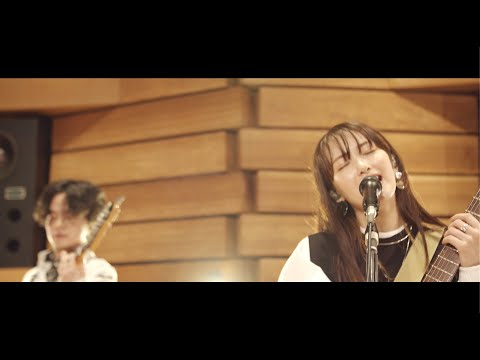

In [7]:
video

In [8]:
import cv2
import face_recognition

In [9]:
!yt-dlp -o "youtube.mp4" https://www.youtube.com/watch?v=$YOUTUBE_ID

[youtube] Extracting URL: https://www.youtube.com/watch?v=--okUL1jPjQ
[youtube] --okUL1jPjQ: Downloading webpage
[youtube] --okUL1jPjQ: Downloading ios player API JSON
[youtube] --okUL1jPjQ: Downloading web creator player API JSON
[youtube] --okUL1jPjQ: Downloading player b0557ce3
[youtube] --okUL1jPjQ: Downloading m3u8 information
[info] --okUL1jPjQ: Downloading 1 format(s): 616+251
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 48
[download] Destination: youtube.mp4.f616.mp4
[download] 100% of   77.91MiB in 00:00:20 at 3.84MiB/s
[download] Destination: youtube.mp4.f251.webm
[download] 100% of    3.53MiB in 00:00:00 at 8.28MiB/s
[Merger] Merging formats into "youtube.mp4.webm"
Deleting original file youtube.mp4.f616.mp4 (pass -k to keep)
Deleting original file youtube.mp4.f251.webm (pass -k to keep)


In [19]:
import yt_dlp
import cv2

YOUTUBE_ID = '--okUL1jPjQ'

ydl_opts = {
    'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/best[ext=mp4]/best', # Prioritize mp4 video and audio
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    info_dict = ydl.extract_info(f"https://www.youtube.com/watch?v={YOUTUBE_ID}", download=False)
    best_url = info_dict['formats'][0]['url'] # Get the URL of the best quality video

capture = cv2.VideoCapture(best_url)

[youtube] Extracting URL: https://www.youtube.com/watch?v=--okUL1jPjQ
[youtube] --okUL1jPjQ: Downloading webpage
[youtube] --okUL1jPjQ: Downloading ios player API JSON
[youtube] --okUL1jPjQ: Downloading web creator player API JSON
[youtube] --okUL1jPjQ: Downloading m3u8 information


In [23]:
capture

< cv2.VideoCapture 0x7cf23c303df0>

In [21]:
face_locations = []


In [22]:
while True:
    # Grab a single frame of video
    ret, frame = capture.read()
    # Convert the image from BGR color (which OpenCV uses) to RGB
    # color (which face_recognition uses)
    rgb_frame = frame[:, :, ::-1]
    # Find all the faces in the current frame of video
    face_locations = face_recognition.face_locations(rgb_frame)
    for top, right, bottom, left in face_locations:
        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0,
        255), 2)
    # Display the resulting image
    cv2.imshow('Video', frame)


    # Wait for Enter key to stop
    if cv2.waitKey(25) == 13:
        break

TypeError: 'NoneType' object is not subscriptable

In [24]:
import yt_dlp
import cv2
import face_recognition  # Import the face_recognition library

YOUTUBE_ID = '--okUL1jPjQ'

ydl_opts = {
    'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/best[ext=mp4]/best',
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    info_dict = ydl.extract_info(f"https://www.youtube.com/watch?v={YOUTUBE_ID}", download=False)
    best_url = info_dict['formats'][0]['url']

capture = cv2.VideoCapture(best_url)

# Check if the video is opened successfully
if not capture.isOpened():
    print("Error opening video file")
    exit()

while True:
    # Grab a single frame of video
    ret, frame = capture.read()

    # Check if a frame was successfully read
    if not ret:
        print("Error reading frame or end of video")
        break

    # Convert the image from BGR color to RGB color
    rgb_frame = frame[:, :, ::-1]

    # Find all the faces in the current frame of video
    face_locations = face_recognition.face_locations(rgb_frame)

    # Draw a box around the face
    for top, right, bottom, left in face_locations:
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Wait for Enter key to stop
    if cv2.waitKey(25) == 13:
        break

# Release the video capture object and close all windows
capture.release()
cv2.destroyAllWindows()

[youtube] Extracting URL: https://www.youtube.com/watch?v=--okUL1jPjQ
[youtube] --okUL1jPjQ: Downloading webpage
[youtube] --okUL1jPjQ: Downloading ios player API JSON
[youtube] --okUL1jPjQ: Downloading web creator player API JSON
[youtube] --okUL1jPjQ: Downloading m3u8 information


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


[youtube] Extracting URL: https://www.youtube.com/watch?v=--okUL1jPjQ
[youtube] --okUL1jPjQ: Downloading webpage
[youtube] --okUL1jPjQ: Downloading ios player API JSON
[youtube] --okUL1jPjQ: Downloading web creator player API JSON
[youtube] --okUL1jPjQ: Downloading m3u8 information


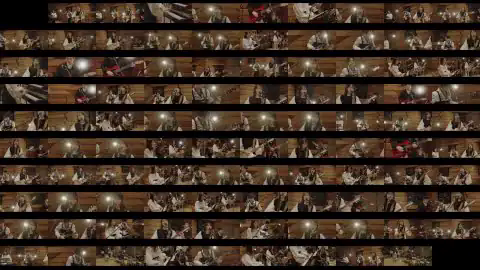

Error reading frame or end of video


In [26]:
import yt_dlp
import cv2
import face_recognition  # Import the face_recognition library
from google.colab.patches import cv2_imshow

YOUTUBE_ID = '--okUL1jPjQ'

ydl_opts = {
    'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/best[ext=mp4]/best',
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    info_dict = ydl.extract_info(f"https://www.youtube.com/watch?v={YOUTUBE_ID}", download=False)
    best_url = info_dict['formats'][0]['url']

capture = cv2.VideoCapture(best_url)

# Check if the video is opened successfully
if not capture.isOpened():
    print("Error opening video file")
    exit()

while True:
    # Grab a single frame of video
    ret, frame = capture.read()

    # Check if a frame was successfully read
    if not ret:
        print("Error reading frame or end of video")
        break

    # Convert the image from BGR color to RGB color
    rgb_frame = frame[:, :, ::-1]

    # Find all the faces in the current frame of video
    face_locations = face_recognition.face_locations(rgb_frame)

    # Draw a box around the face
    for top, right, bottom, left in face_locations:
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

    # Display the resulting image
    cv2_imshow(frame)

    # Wait for Enter key to stop
    if cv2.waitKey(25) == 13:
        break

# Release the video capture object and close all windows
capture.release()
cv2.destroyAllWindows()